<a href="https://colab.research.google.com/github/OussamaEttalhaoui/PresentationApp/blob/master/Ettalhaoui_Oussama_2iad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Nom : Ettalhaoui
*   Prénom : Oussama
*   Master : [2IAD]

# **Consignes**

*   Répondez aux exercices puis allez dans "File" > "Download" > "Download .ipynb" pour télécharger l'exam corrigé.
*   Renommez le fichier sous format : **Nom_Prenom_Master.ipynb**
*   Envoyez le fichier .ipynb par courriel : badouchmohamed@gmail.com

# **Exercice 1 : Régression Linéaire (5 points)**

Utilisez le dataset : from keras.datasets import boston_housing

*   Implémentation (3 points) : Implémentez un modèle de régression linéaire pour prédire le prix des maisons en fonction de leurs caractéristiques (surface, nombre de chambres, etc.)
*   Évaluation des Performances (1 points) : Évaluez les performances du modèle à l'aide de la métrique RMSE (Root Mean Squared Error)
*   Analyse des Résultats (1 point) : Interprétez les coefficients du modèle et discutez de leur signification


In [3]:
from keras.datasets import boston_housing
print('Exercice 1 - DEBUT')
# TODO
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


(X_train, Y_train), (X_test, Y_test) = boston_housing.load_data()

# implementation du modele
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

# evaluation performances
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Erreur quadratique moyenne (RMSE) : {rmse:.2f}")

# Coefficients et leur signification
coefficients = model.coef_
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

coefficients_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})
print("\nCoefficients du modèle :")
print(coefficients_df)

print("\nLeur signification :")
print(" Un coeficient positif => l'augmentation de cette caracteristique est associe à une hausse  prix")
print(" Un coefficient négatif => l'augmentation de cette caracteristique est associe à une baise du prix.")
print(" un coefficient eleve pour RM (nb de pieces) signifie que les maisons avec plus de pieces veulent etre plus cheres")

print('Exercice 1 - FIN')

Exercice 1 - DEBUT
Erreur quadratique moyenne (RMSE) : 4.82

Coefficients du modèle :
    Feature  Coefficient
0      CRIM    -0.119998
1        ZN     0.057000
2     INDUS     0.003984
3      CHAS     4.126982
4       NOX   -20.500296
5        RM     3.380249
6       AGE     0.007568
7       DIS    -1.711898
8       RAD     0.334748
9       TAX    -0.011780
10  PTRATIO    -0.902318
11        B     0.008719
12    LSTAT    -0.555843

Leur signification :
 Un coeficient positif => l'augmentation de cette caracteristique est associe à une hausse  prix
 Un coefficient négatif => l'augmentation de cette caracteristique est associe à une baise du prix.
 un coefficient eleve pour RM (nb de pieces) signifie que les maisons avec plus de pieces veulent etre plus cheres
Exercice 1 - FIN


# **Exercice 2 : Classification des Fleurs d'Iris avec un Réseau de Neurones (5 points)**

Utilisez le dataset : from keras.datasets import boston_housing

*   Implémentation d'un Réseau de Neurones Simple (2 points) : Créez et entraînez un réseau de neurones simple pour classer les fleurs d'iris.
*   Implémentation d'un Réseau de Neurones Complexe (2 points) : Créez et entraînez un réseau de neurones plus complexe (ajout de couches supplémentaires).
*   Comparaison des Performances (1 points) : Comparez les performances des deux modèles en utilisant la précision et la F1-score.

In [10]:
from keras.datasets import boston_housing
print('Exercice 2 - DEBUT')
# TODO
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation pour des bonnes performances
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

# implementation de réseau de neurones simple
modele_simple = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(3, activation='softmax')
])

modele_simple.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modele_simple.fit(X_train, y_train, epochs=50, batch_size=5, verbose=1)

pred_y_simple = np.argmax(modele_simple.predict(X_test), axis=1)
accuracy_simple = accuracy_score(y_test, pred_y_simple)
f1_simple = f1_score(y_test, pred_y_simple, average='weighted')

print(f"Reseau Simple Accuracy: {accuracy_simple:.2f}, F1-Score: {f1_simple:.2f}")

# implementation de réseau de neurones complex
modele_complex = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])
modele_complex.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modele_complex.fit(X_train, y_train, epochs=50, batch_size=5, verbose=1)

pred_y_complex = np.argmax(modele_complex.predict(X_test), axis=1)
accuracy_complex = accuracy_score(y_test, pred_y_complex)
f1_complex = f1_score(y_test, pred_y_complex, average='weighted')

print(f"Reseau Complexe Accuracy: {accuracy_complex:.2f}, F1-Score: {f1_complex:.2f}")
# comparaison des performances
print("\nComparaison des performances :")
print(f"Accuracy du Reseau Simple : {accuracy_simple:.2f},  F1-Score: {f1_simple:.2f}")
print(f"Accuracy du Reseau Complexe : {accuracy_complex:.2f},  F1-Score: {f1_complex:.2f}")


print('Exercice 2 - FIN')

Exercice 2 - DEBUT
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3639 - loss: 1.7046   
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3240 - loss: 1.6241 
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3051 - loss: 1.3034 
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4765 - loss: 1.0851 
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5637 - loss: 0.9918
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6670 - loss: 0.8438 
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7396 - loss: 0.7450 
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7498 - loss: 0.6880 
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7870 - loss: 0.6402 
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7744 - loss: 0.6382 
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7723 - loss: 0.6022 
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7641 - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6711 - loss: 0.9957
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7069 - loss: 0.8804 
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6851 - loss: 0.8228 
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6662 - loss: 0.7502 
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6990 - loss: 0.6464 
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6540 - loss: 0.6386  
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7125 - loss: 0.6068 
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7041 - loss: 0.5691 
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7063 - loss: 0.5183 
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7573 - loss: 0.4741 
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7840 - loss: 0.4891 
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8355 - lo

# **Exercice 3 : Réseau de Neurones Convolutionnel (CNN) (5 points)**

Utilisez le dataset CIFAR10 : from keras.datasets import cifar10

*   Implémentation (4 points) : Implémentez un réseau de neurones convolutionnel (CNN) pour classer des images de différentes catégories. Utilisez un ensemble de données d'images approprié (CIFAR-10).
*   Évaluation des Performances (1 points) : Évaluez les performances du modèle en utilisant la précision globale sur l'ensemble de test.

Exercice 3 - DEBUT
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.4024 - loss: 1.6515 - val_accuracy: 0.5992 - val_loss: 1.1529
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.6162 - loss: 1.1021 - val_accuracy: 0.6389 - val_loss: 1.0291
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6705 - loss: 0.9516 - val_accuracy: 0.6650 - val_loss: 0.9659
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7076 - loss: 0.8393 - val_accuracy: 0.6885 - val_loss: 0.9052
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7370 - loss: 0.7507 - val_accuracy: 0.6981 - val_loss: 0.9001
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7682 - loss: 0.6677 - val_accuracy: 0.7067 - val_loss: 0.8932
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7890 - loss: 0.5980 - val_accuracy: 0.6998 - val_loss: 0.9148
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8151 - loss: 0.5260

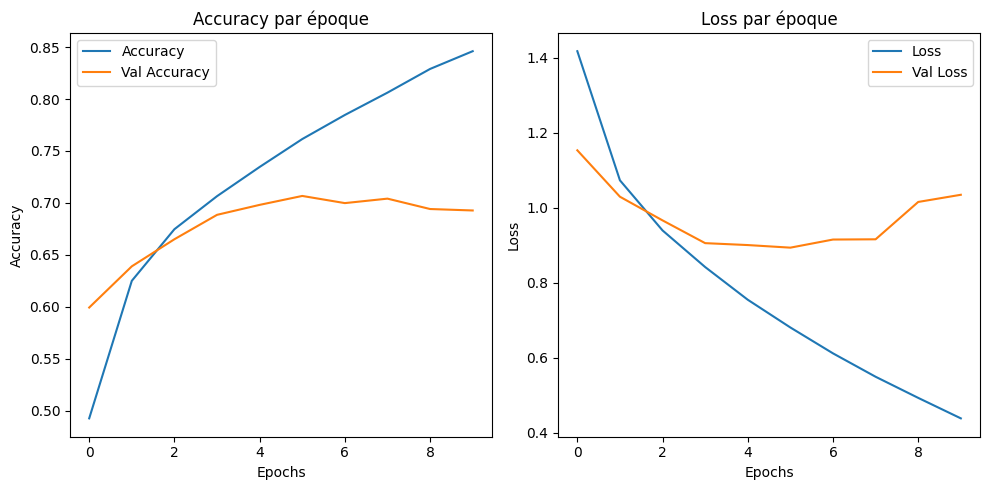

Exercice 3 - FIN


In [11]:
from keras.datasets import cifar10
print('Exercice 3 - DEBUT')
# TODO
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

model = Sequential()

# 1ere couche de convolution & pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 2eme ...
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
# Dense
model.add(Dense(128, activation='relu'))
# sortie
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=32)

# evaluation des performances
loss, accuracy = model.evaluate(x_test, y_test)
print(f"la Precision sur les donnees du test : {accuracy * 100:.2f}%")


plt.figure(figsize=(10, 5))

# courbe precision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy par époque')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# .... perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss par époque')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


print('Exercice 3 - FIN')

# **Exercice 4 : Large Language Models (GPT) (5 points)**

*   Implémentation (4 points) : Utilisez un modèle de langage pré-entraîné (par exemple, GPT-2 ou BERT) pour générer un paragraphe sur les avantages des énergies renouvelables. Implémentez un pipeline de génération de texte en utilisant la bibliothèque Transformers de Hugging Face.
*   Analyse des Résultats (1 point) : Interprétez les résultats et discutez des forces et des limites des modèles de langage utilisés

In [16]:
from transformers import pipeline
print('Exercice 4 - DEBUT')
# TODO

# Création du pipeline
text_generator = pipeline("text-generation", model="gpt2")

# generer le paragraphe
prompt = "The advantages of renewable energy "
generated_texts = text_generator(
    prompt,
    max_length=150,
    num_return_sequences=1,
    temperature=0.7,
    top_p=0.9,
    repetition_penalty=1.2
)

# Affichage
for idx, text in enumerate(generated_texts):
    print(f"Texte généré {idx + 1}:\n{text['generated_text']}")

print("\n Analyse des resultats :")
print("les Forces :")
print("* Les modeles de langage comme GPT-2 generent du texte fluide et correct en grammaire ")
print("* capables d'apporter des idées nouvelles ")
print("les Limites :")
print("* Le texte genere peut inclure des informations inexactes ")
print("* ne comprennent pas reellement le contexte car ils se basent sur des donnees deja existees ")
print("* la qualite du texte varie beaucoup en fonction des reglages ")
print('Exercice 4 - FIN')

Exercice 4 - DEBUT


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Texte généré 1:
The advantages of renewable energy  are not clear, but it is a lot more cost effective than using fossil fuels.
As with other renewables (i know), they are often tied to specific types and processes such as wind or solar power which provide the most benefit from their performance compared that produced by conventional sources like natural gas for instance. They may also be able use this electricity in ways similar to those used on traditional coal-fired plants where there would have been fewer people getting sick if these technologies were developed today - especially given climate change impacts around our cities including new fires due largelyto carbon dioxide emissions we will see through much greater amountsfurther down the road."

 Analyse des resultats :
les Forces :
* Les modeles de langage comme GPT-2 generent du texte fluide et correct en grammaire 
* capables d'apporter des idées nouvelles 
les Limites :
* Le texte genere peut inclure des informations inexacte